In [100]:
# Importing libraries
import pandas as pd

In [3]:
# we can set numbers for how many rows and columns will be displayed
pd.set_option('display.min_rows', 10) #default will be 10
pd.set_option('display.max_columns', 20)

In [4]:
# read csv file

df = pd.read_csv('online_store_customer_data.csv')
df.head(3)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60


# Task 1

In [5]:
# •	Find out the number of rows and columns in your data frame by using function shape
print("Data Shape: ", df.shape)
print("Rows in Data: ", df.shape[0])
print("Columns in Data: ", df.shape[1])

Data Shape:  (2512, 11)
Rows in Data:  2512
Columns in Data:  11


In [6]:
# •	Display the statistical summary of your data frame by using describe() function.
df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [7]:
# •	Use function info to find out columns, their data types, and number of non-null values in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


In [8]:
# •	Use function value_counts() to find out unique values and their frequency in columns Gender, Marital_status, and Payement_method.
print(df['Gender'].value_counts())
print(df['Marital_status'].value_counts())
print(df['Payment_method'].value_counts())

Gender
Female    1356
Male      1128
Name: count, dtype: int64
Marital_status
Married    1473
Single     1039
Name: count, dtype: int64
Payment_method
PayPal    1168
Card       749
Other      595
Name: count, dtype: int64


TASK IN PRACTICAL

Displaying Unique Values in columns

In [9]:
employees_status = df['Employees_status'].value_counts()
employees_status

Employees_status
Employees        946
workers          798
self-employed    487
Unemployment     255
Name: count, dtype: int64

In [10]:
payment_methods = df['Payment_method'].value_counts()
payment_methods

Payment_method
PayPal    1168
Card       749
Other      595
Name: count, dtype: int64

Getting the index value of all unemployed people whose payment method is other

In [11]:
df[(df['Employees_status']=='Unemployment') & (df['Payment_method']=='Other')].index

Index([   0,   38,   72,  102,  105,  109,  112,  127,  131,  168,  178,  202,
        245,  282,  326,  352,  406,  416,  556,  642,  654,  655,  724,  893,
        930,  931,  945,  994, 1023, 1089, 1107, 1149, 1241, 1252, 1312, 1324,
       1330, 1348, 1493, 1506, 1567, 1588, 1589, 1615, 1616, 1653, 1726, 1803,
       1838, 1867, 2004, 2021, 2086, 2120, 2228, 2287, 2323, 2371],
      dtype='int64')

In [12]:
# Dropping all the rows that comply with those conditions

df = df.drop(df[(df['Employees_status']=='Unemployment') & (df['Payment_method']=='Other')].index)
df.head(5)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
5,1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66


In [13]:
df.shape

(2454, 11)

# Task 2

ENCODING

In [14]:
df.isna().sum()

Transaction_date      0
Transaction_ID        0
Gender               27
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             149
Amount_spent        235
dtype: int64

In [15]:
df.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               27
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             149
Amount_spent        235
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2454 entries, 1 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2454 non-null   object 
 1   Transaction_ID    2454 non-null   int64  
 2   Gender            2427 non-null   object 
 3   Age               2412 non-null   float64
 4   Marital_status    2454 non-null   object 
 5   State_names       2454 non-null   object 
 6   Segment           2454 non-null   object 
 7   Employees_status  2428 non-null   object 
 8   Payment_method    2454 non-null   object 
 9   Referal           2305 non-null   float64
 10  Amount_spent      2219 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 230.1+ KB


In [17]:
# Finding out unique values in nomial data column in this case Gender

df['Gender'].value_counts()

Gender
Female    1330
Male      1097
Name: count, dtype: int64

Using manual encoding: replace

In [18]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/2427915869.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,1/1/2019,151201,1.0,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,1.0,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,1.0,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
5,1/3/2019,151205,1.0,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,0.0,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,0.0,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,1.0,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


REPLACING 
Marital_status
Employees_status
Payment_method

In [19]:
df['Marital_status'].value_counts()

Marital_status
Married    1432
Single     1022
Name: count, dtype: int64

In [20]:
df['Marital_status'] = df['Marital_status'].replace({'Married' : 0, 'Single' : 1})
df

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/1514570998.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_status'] = df['Marital_status'].replace({'Married' : 0, 'Single' : 1})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,1/1/2019,151201,1.0,49.0,1,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,1.0,63.0,0,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,1,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,1.0,27.0,1,Connecticut,Basic,self-employed,Card,0.0,NaN
5,1/3/2019,151205,1.0,71.0,1,Hawaii,Basic,Employees,PayPal,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,0.0,57.0,1,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,0.0,36.0,0,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,1.0,22.0,1,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,1,New York,Basic,Employees,PayPal,0.0,1909.77


In [21]:
df['Employees_status'].value_counts()

Employees_status
Employees        946
workers          798
self-employed    487
Unemployment     197
Name: count, dtype: int64

In [22]:
df['Employees_status'] = df['Employees_status'].replace({'Employees' : 0, 'workers' : 1, 'self-employed' : 2, 'Unemployment' : 3})
df

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/2801444503.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Employees_status'] = df['Employees_status'].replace({'Employees' : 0, 'workers' : 1, 'self-employed' : 2, 'Unemployment' : 3})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,1/1/2019,151201,1.0,49.0,1,Illinois,Basic,2.0,Card,0.0,544.04
2,1/1/2019,151202,1.0,63.0,0,New Mexico,Basic,1.0,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,1,Virginia,Platinum,1.0,Card,1.0,1199.79
4,1/1/2019,151204,1.0,27.0,1,Connecticut,Basic,2.0,Card,0.0,NaN
5,1/3/2019,151205,1.0,71.0,1,Hawaii,Basic,0.0,PayPal,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,0.0,57.0,1,South Carolina,Platinum,2.0,Card,0.0,150.10
2508,5/1/2021,153696,0.0,36.0,0,Hawaii,Silver,2.0,PayPal,1.0,708.88
2509,5/1/2021,153697,1.0,22.0,1,South Carolina,Basic,1.0,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,1,New York,Basic,0.0,PayPal,0.0,1909.77


In [23]:
df['Payment_method'].value_counts()

Payment_method
PayPal    1168
Card       749
Other      537
Name: count, dtype: int64

In [24]:
df['Payment_method'] = df['Payment_method'].replace({'PayPal' : 0, 'Card' : 1, 'Other' : 2})
df

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/1590618061.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment_method'] = df['Payment_method'].replace({'PayPal' : 0, 'Card' : 1, 'Other' : 2})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,1/1/2019,151201,1.0,49.0,1,Illinois,Basic,2.0,1,0.0,544.04
2,1/1/2019,151202,1.0,63.0,0,New Mexico,Basic,1.0,0,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,1,Virginia,Platinum,1.0,1,1.0,1199.79
4,1/1/2019,151204,1.0,27.0,1,Connecticut,Basic,2.0,1,0.0,NaN
5,1/3/2019,151205,1.0,71.0,1,Hawaii,Basic,0.0,0,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,0.0,57.0,1,South Carolina,Platinum,2.0,1,0.0,150.10
2508,5/1/2021,153696,0.0,36.0,0,Hawaii,Silver,2.0,0,1.0,708.88
2509,5/1/2021,153697,1.0,22.0,1,South Carolina,Basic,1.0,0,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,1,New York,Basic,0.0,0,0.0,1909.77


In [25]:
df = pd.read_csv('online_store_customer_data.csv')
df

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


PANDAS LIBRARY REPLACING METHOD: cat.codes

In [26]:
# Changing the category of the data column
df['State_names'] = df['State_names'].astype('category')

df['State_names'] = df['State_names'].cat.codes

df

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,15,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,12,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,30,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,45,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,6,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,39,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,10,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,39,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,31,Basic,Employees,PayPal,0.0,1909.77


Ordinal Encoding using scikitlearn library

In [27]:
df = pd.read_csv('online_store_customer_data.csv')

In [28]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
oe = OrdinalEncoder()

In [29]:
df['State_names'] = oe.fit_transform(df[['State_names']])
df

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,15.0,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,12.0,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,30.0,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,45.0,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,6.0,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,39.0,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,10.0,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,39.0,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,31.0,Basic,Employees,PayPal,0.0,1909.77


ONEHOT ENCODING

In [94]:
df = pd.read_csv('online_store_customer_data.csv')

In [95]:
# Using pandas library

# Convery ordinal categorical feature to numeric using dummy encoding
# Get one hot encoding of columns 'Segment'
one_hot = pd.get_dummies(df['Segment'])
# Drop column 'Segment'as it is now encoded
df = df.drop('Segment',axis = 1)
# Join the encoded df
df = df.join(one_hot)

df

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Basic,Gold,Missing,Platinum,Silver
0,1/1/2019,151200,Female,19.0,Single,Kansas,Unemployment,Other,1.0,2051.36,True,False,False,False,False
1,1/1/2019,151201,Male,49.0,Single,Illinois,self-employed,Card,0.0,544.04,True,False,False,False,False
2,1/1/2019,151202,Male,63.0,Married,New Mexico,workers,PayPal,1.0,1572.60,True,False,False,False,False
3,1/1/2019,151203,NaN,18.0,Single,Virginia,workers,Card,1.0,1199.79,False,False,False,True,False
4,1/1/2019,151204,Male,27.0,Single,Connecticut,self-employed,Card,0.0,NaN,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,self-employed,Card,0.0,150.10,False,False,False,True,False
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,self-employed,PayPal,1.0,708.88,False,False,False,False,True
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,workers,PayPal,1.0,2030.07,True,False,False,False,False
2510,5/1/2021,153698,NaN,44.0,Single,New York,Employees,PayPal,0.0,1909.77,True,False,False,False,False


Using Scikit Learn

In [116]:
df = pd.read_csv('online_store_customer_data.csv')

In [117]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder from sklearn
ohe = OneHotEncoder(sparse_output=False)
# drop='first' to avoid the dummy variable trap (optional)
# Apply OneHotEncoder to the 'Segment' column
Ohe_coded = ohe.fit_transform(df[['Segment']])
# Convert the result into a DataFrame with proper column names
one_hot_df = pd.DataFrame(Ohe_coded,columns=ohe.get_feature_names_out(['Segment']))
# Drop the original 'Segment' column
df = df.drop('Segment', axis=1)
# Join the new one-hot encoded df back to the original
df = df.join(one_hot_df)

df

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Segment_Basic,Segment_Gold,Segment_Missing,Segment_Platinum,Segment_Silver
0,1/1/2019,151200,Female,19.0,Single,Kansas,Unemployment,Other,1.0,2051.36,1.0,0.0,0.0,0.0,0.0
1,1/1/2019,151201,Male,49.0,Single,Illinois,self-employed,Card,0.0,544.04,1.0,0.0,0.0,0.0,0.0
2,1/1/2019,151202,Male,63.0,Married,New Mexico,workers,PayPal,1.0,1572.60,1.0,0.0,0.0,0.0,0.0
3,1/1/2019,151203,NaN,18.0,Single,Virginia,workers,Card,1.0,1199.79,0.0,0.0,0.0,1.0,0.0
4,1/1/2019,151204,Male,27.0,Single,Connecticut,self-employed,Card,0.0,NaN,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,self-employed,Card,0.0,150.10,0.0,0.0,0.0,1.0,0.0
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,self-employed,PayPal,1.0,708.88,0.0,0.0,0.0,0.0,1.0
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,workers,PayPal,1.0,2030.07,1.0,0.0,0.0,0.0,0.0
2510,5/1/2021,153698,NaN,44.0,Single,New York,Employees,PayPal,0.0,1909.77,1.0,0.0,0.0,0.0,0.0


# Task 3

In [32]:
# Drop column Transaction_date from main dataframe
df.drop(columns = 'Transaction_date', inplace=True)

In [33]:
# Drop column “Amount_spent” using df.drop(‘column name’, inplace=True)
df_temp = df.copy()
df_temp.drop(columns=['Amount_spent'], inplace=True)
df_temp.head(3)

,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Basic,Gold,Missing,Platinum,Silver
0,151200,Female,19.0,Single,Kansas,Unemployment,Other,1.0,True,False,False,False,False
1,151201,Male,49.0,Single,Illinois,self-employed,Card,0.0,True,False,False,False,False
2,151202,Male,63.0,Married,New Mexico,workers,PayPal,1.0,True,False,False,False,False


In [34]:
print(df_temp.isnull().sum())

Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Employees_status     26
Payment_method        0
Referal             155
Basic                 0
Gold                  0
Missing               0
Platinum              0
Silver                0
dtype: int64


In [35]:
# Remove rows from data frame where Employee_status values are missing.

df_temp.dropna(subset = ["Employees_status"], inplace=True)
df_temp.isnull().sum()

Transaction_ID        0
Gender               27
Age                  42
Marital_status        0
State_names           0
Employees_status      0
Payment_method        0
Referal             154
Basic                 0
Gold                  0
Missing               0
Platinum              0
Silver                0
dtype: int64

In [36]:
# Replace Amount_spent missing values with the mean value of amount_spent.
mean_AS = df['Amount_spent'].mean()
df['Amount_spent'].fillna(mean_AS, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/282788926.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount_spent'].fillna(mean_AS, inplace=True)


Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent          0
Basic                 0
Gold                  0
Missing               0
Platinum              0
Silver                0
dtype: int64

In [37]:
# Replace missing values in Age with the mean age value.
mean_Age = df['Age'].mean()
df['Age'].fillna(mean_Age, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/87484663.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_Age, inplace=True)


Transaction_ID        0
Gender               28
Age                   0
Marital_status        0
State_names           0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent          0
Basic                 0
Gold                  0
Missing               0
Platinum              0
Silver                0
dtype: int64

In [38]:
# Replace missing values in Referal with the mean Referal value.
mean_R = df['Referal'].mean()
df['Referal'].fillna(mean_R, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/2169838137.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Referal'].fillna(mean_R, inplace=True)


Transaction_ID       0
Gender              28
Age                  0
Marital_status       0
State_names          0
Employees_status    26
Payment_method       0
Referal              0
Amount_spent         0
Basic                0
Gold                 0
Missing              0
Platinum             0
Silver               0
dtype: int64

In [39]:
# Replace missing values in “Employee_status” with the mode value of column “Employee_status”.
mode_emp = df['Employees_status'].mode().iloc[0]
df['Employees_status'].fillna(mode_emp, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/1150892309.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employees_status'].fillna(mode_emp, inplace=True)


Transaction_ID       0
Gender              28
Age                  0
Marital_status       0
State_names          0
Employees_status     0
Payment_method       0
Referal              0
Amount_spent         0
Basic                0
Gold                 0
Missing              0
Platinum             0
Silver               0
dtype: int64

In [40]:
# Replace missing values in Gender with the mode value of column Gender.
mode_Gender = df['Gender'].mode().iloc[0]
df['Gender'].fillna(mode_Gender, inplace=True)
df.isnull().sum()

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_24926/2346130288.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(mode_Gender, inplace=True)


Transaction_ID      0
Gender              0
Age                 0
Marital_status      0
State_names         0
Employees_status    0
Payment_method      0
Referal             0
Amount_spent        0
Basic               0
Gold                0
Missing             0
Platinum            0
Silver              0
dtype: int64

VARIANCE, COVARIANCE, CORRELATION

In [123]:
df = pd.read_csv('online_store_customer_data.csv')

In [133]:
# Variance

df.var(numeric_only=True)

Transaction_ID    525016.874984
Age                  330.740664
Referal                0.226962
Amount_spent      771775.341728
dtype: float64

In [127]:
# Covariance

df.cov(numeric_only=True)

,Transaction_ID,Age,Referal,Amount_spent
Transaction_ID,525016.874984,-118.900121,-0.992700,-4243.907804
Age,-118.900121,330.740664,0.116250,-374.212577
Referal,-0.992700,0.116250,0.226962,-2.846734
Amount_spent,-4243.907804,-374.212577,-2.846734,771775.341728


In [129]:
# Correlation

df.corr(numeric_only=True)

,Transaction_ID,Age,Referal,Amount_spent
Transaction_ID,1.000000,-0.009019,-0.002859,-0.006672
Age,-0.009019,1.000000,0.013423,-0.023342
Referal,-0.002859,0.013423,1.000000,-0.006779
Amount_spent,-0.006672,-0.023342,-0.006779,1.000000


<Axes: >

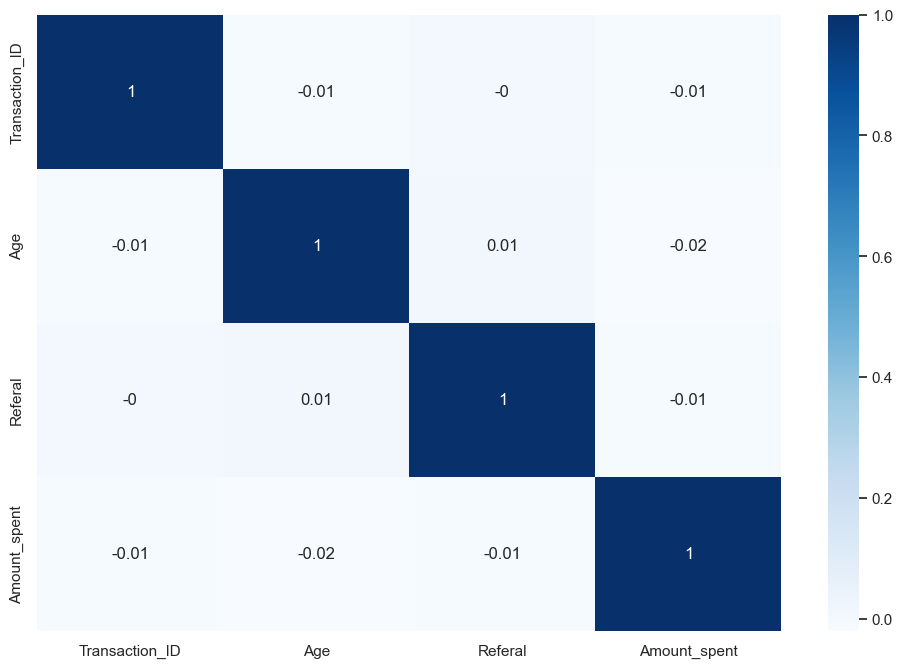

In [131]:
# Correlation Heatmap visualisation
# visualise correlation
import seaborn as sb
corr = df.corr(numeric_only=True).round(2)
sb.set (rc = {'figure.figsize':(12, 8)})
sb.heatmap(corr, cmap="Blues", annot=True)

Scaling

In [135]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
df_min_max = df.copy()


df_min_max = pd.DataFrame(minmax_scaler.fit_transform(df_min_max.values),columns=df_min_max.columns, index=df_min_max.index)
print("Scaled Dataset Using Min Max Scaler")
df_min_max.head()

ValueError: could not convert string to float: '1/1/2019'